## Data Description
The Haberman's survival dataset contains cases from a study that was conducted between 1958 and 1970    at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
#### Objective:
To predict whether the patient will survive after five years or not based on the attributes age,operation year and axil nodes

# 1. Environment Configuration

In [151]:
# import all necessary packages
import pandas as pd      
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 2. Loading The Data

Attribute Information:

Age              ---- Age of patient at time of operation (numerical)

Op_year          ----Patient's year of operation (numerical)

axil_nodes       ----Number of positive axillary nodes detected (numerical)

Survival_status  ----Survival status (class label)

1 = the patient survived 5 years or longer

2 = the patient died within 5 year

Here, Age, Op_year and axil_nodes are "variables" AND Survival_status is "class label"

In [152]:
#Load the dataset
haber =pd.read_csv("D:\\haberman.csv")
print(haber)

     30  64   1  1.1
0    30  62   3    1
1    30  65   0    1
2    31  59   2    1
3    31  65   4    1
4    33  58  10    1
5    33  60   0    1
6    34  59   0    2
7    34  66   9    2
8    34  58  30    1
9    34  60   1    1
10   34  61  10    1
11   34  67   7    1
12   34  60   0    1
13   35  64  13    1
14   35  63   0    1
15   36  60   1    1
16   36  69   0    1
17   37  60   0    1
18   37  63   0    1
19   37  58   0    1
20   37  59   6    1
21   37  60  15    1
22   37  63   0    1
23   38  69  21    2
24   38  59   2    1
25   38  60   0    1
26   38  60   0    1
27   38  62   3    1
28   38  64   1    1
29   38  66   0    1
..   ..  ..  ..  ...
275  67  66   0    1
276  67  61   0    1
277  67  65   0    1
278  68  67   0    1
279  68  68   0    1
280  69  67   8    2
281  69  60   0    1
282  69  65   0    1
283  69  66   0    1
284  70  58   0    2
285  70  58   4    2
286  70  66  14    1
287  70  67   0    1
288  70  68   0    1
289  70  59   8    1
290  70  63  

In [153]:
print(haber.columns)

Index(['30', '64', '1', '1.1'], dtype='object')


###### As,we have observed that our variable names/column names are in integer format we need to rename it so that we can access our column datapoints(data) easily.

Here we can can change column name with two approaches:

1. By directly assigning the names in list of columns,but A problem with this approach to change column names is that one has to change names of all the columns in the data frame. This approach would not work, if we want to change just change the name of one column.
2. By using the rename function 
   We need to specify a mapper, a dictionary with old name as keys and new name as values. 

In [154]:
#Approach ii
haber.rename(columns={'30':'Age','64':'Op_year','1':'axil_nodes','float(1.1)':'Survival_status'},inplace=True)
print(haber.columns)

Index(['Age', 'Op_year', 'axil_nodes', '1.1'], dtype='object')


In [155]:
#Approach i
haber.columns=['Age','Op_year','axil_nodes','Survival_status']
print(haber.columns)

Index(['Age', 'Op_year', 'axil_nodes', 'Survival_status'], dtype='object')


# 3. Data Preparation
In this phase you enhance the quality of the data and prepare it for use in subsequent steps.It ensures that the data is in a suitable format for use in your models.

In [156]:
print(haber.shape)         #To check the no. of rows and columns in our dataset

(305, 4)


In [157]:
haber.describe()

,Age,Op_year,axil_nodes,Survival_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [158]:
haber.isnull()             #To check if there are any null values in our dataset

,Age,Op_year,axil_nodes,Survival_status
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [179]:
haber['Survival_status'].value_counts() #To check the count of the no. of people living for 5 year or above and 5 years and below"""

1    224
2     81
Name: Survival_status, dtype: int64

### Imbalanced dataset
As, we can observe in the output above that the counts of number of people living more than 5 years and number of people living less than 5 years differ to a greater extent.Hence, our dataset is imbalanced.

# 4. Data Exploration
Data exploration is concerned with building a deeper understanding of your data. You try to understand how variables interact with each other, the distribution of the data, and whether there are outliers.

## 2-D Scatter Plot

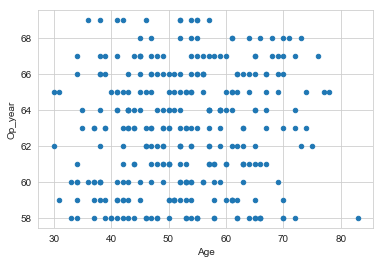

In [160]:
haber.plot(kind='scatter',x='Age',y='Op_year')
plt.show()

Here, we are scattering all the points on the graph.We can also scatter points using other combinations also like Op_year and axil_nodes,axil_nodes and Age.

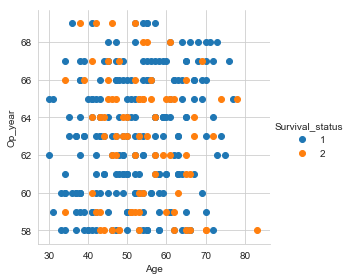

In [161]:
#Here,we are coloring our points
#Plotting Age and Op_year
#The size attribute is updated as height
plt.close()
sns.set_style("whitegrid")                               
sns.FacetGrid(haber,hue='Survival_status',height=4)\
   .map(plt.scatter,"Age","Op_year").add_legend()
plt.show()

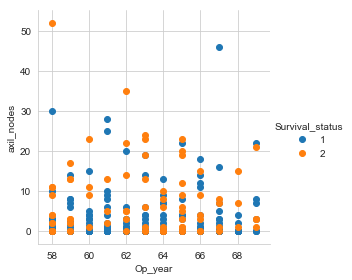

In [162]:
#Plotting Op_year and axil_nodes
plt.close()
sns.set_style("whitegrid")                              
sns.FacetGrid(haber,hue='Survival_status',height=4)\
   .map(plt.scatter,"Op_year","axil_nodes").add_legend()
plt.show()

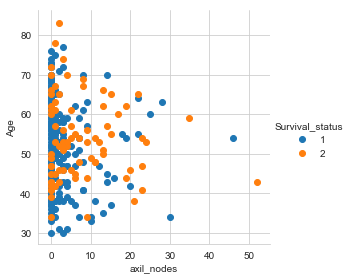

In [163]:
#Plotting axil_nodes and Age
plt.close()
sns.set_style("whitegrid")                              
sns.FacetGrid(haber,hue='Survival_status',height=4)\
   .map(plt.scatter,"axil_nodes","Age").add_legend()
plt.show()

## Observations:
1. The output for the above code only gives us the range of variables. 

2. We cannot differentiate among the points as they have considerable overlapping.

# Pair-plot

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
D:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


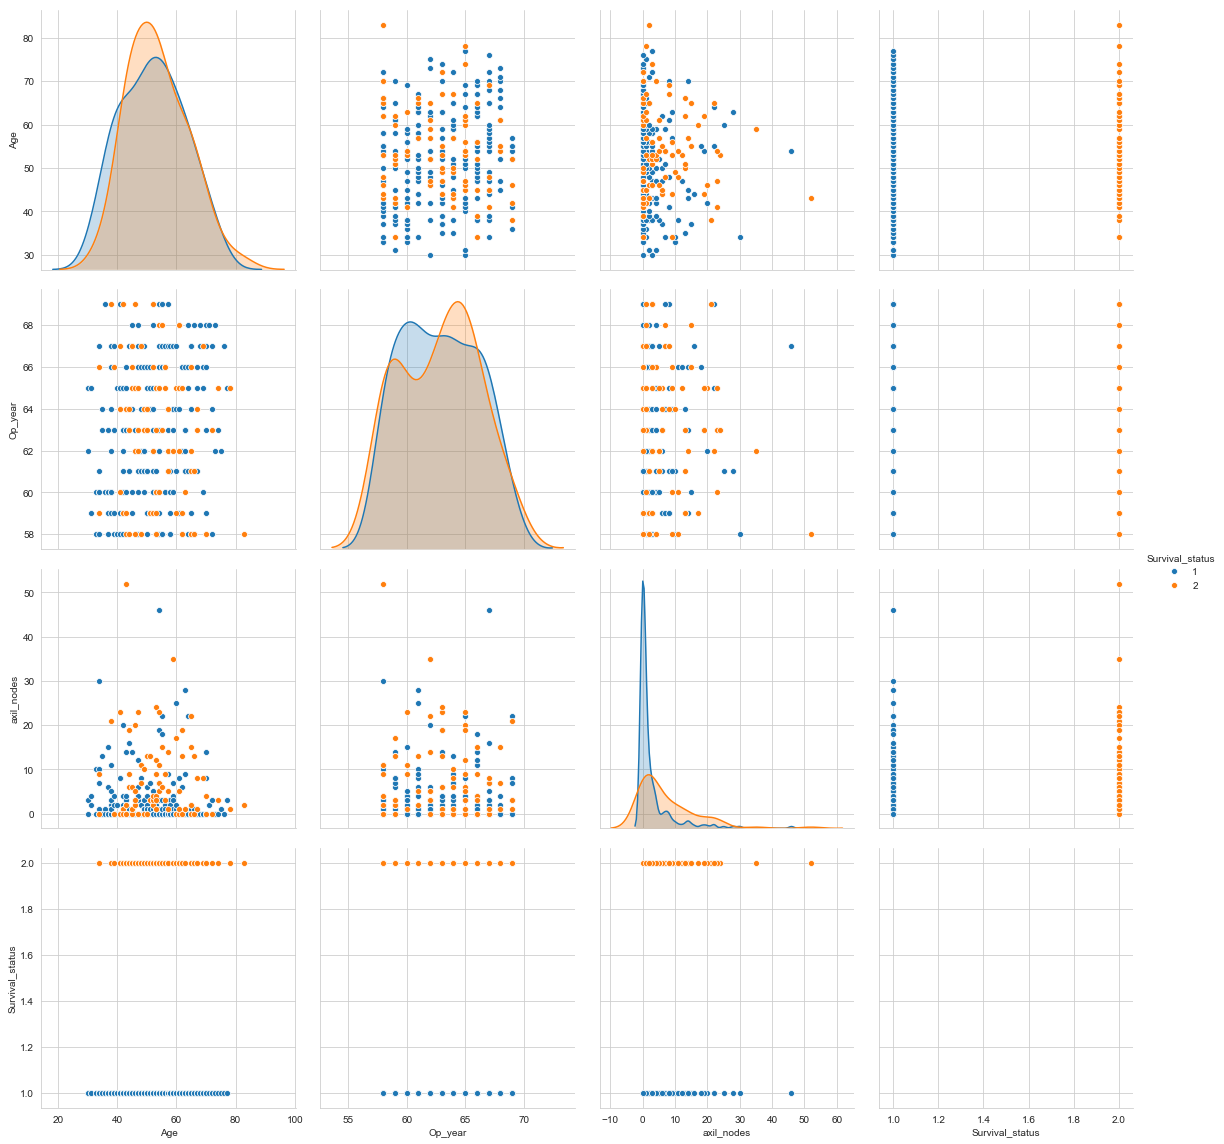

In [164]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
sns.pairplot(haber,hue="Survival_status",height=4)
plt.show()

## Observation:
1. Here,among all the observations our axil_nodes and Op_year features gives us better differentiation
   among the points.
2. But,we cannot seperate the points with simple linear seperation and by applying if-else condition      to it.

In [165]:
haber.dtypes               #To find the datatype of each column

Age                int64
Op_year            int64
axil_nodes         int64
Survival_status    int64
dtype: object

# 1-D Scatter Plot

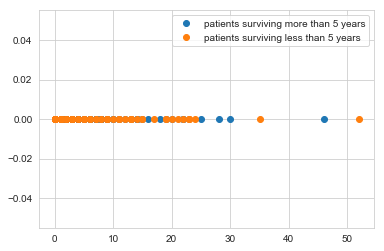

In [170]:
#Here, we seperate the no.of patients living more thaan 5 years and less than 5 years into two seperate variables
import numpy as np
labels = ["patients surviving more than 5 years","patients surviving less than 5 years"]
haber_more_than_5_years = haber.loc[haber["Survival_status"].astype(str) == "1"];
haber_less_than_5_years = haber.loc[haber["Survival_status"].astype(str) == "2"];
#We,plot the axil_nodes of the above two variables on x-axis and assign value 0 to y-axis
plt.plot(haber_more_than_5_years ["axil_nodes"], np.zeros_like(haber_more_than_5_years ['axil_nodes']), 'o')
plt.plot(haber_less_than_5_years ["axil_nodes"], np.zeros_like(haber_less_than_5_years ['axil_nodes']), 'o')
plt.legend(labels)

## Observation:
1. They are very hard to make sense as points are overlapping alot.
2. They only help to visualize points in a particular window size.
3. To view these points we make use of Histograms.

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


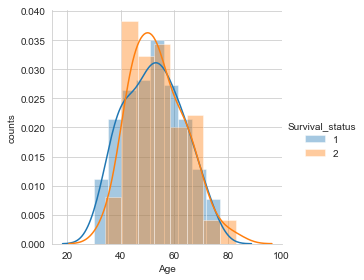

In [174]:
#Histogram for feature(variable) Age.
sns.FacetGrid(haber,hue='Survival_status',height=4)\
    .map(sns.distplot,"Age").add_legend()
plt.ylabel("counts")
plt.show()

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


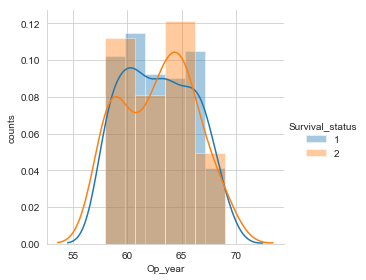

In [175]:
#Histogram for feature(variable) Op_year.
sns.FacetGrid(haber,hue='Survival_status',height=4)\
    .map(sns.distplot,"Op_year").add_legend()
plt.ylabel("counts")
plt.show()

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


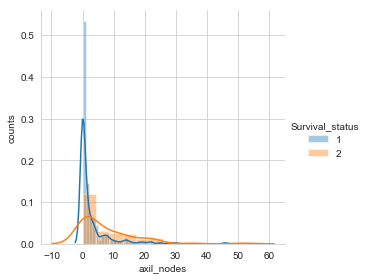

In [173]:
#Histogram for feature(variable) axil_nodes.
sns.FacetGrid(haber,hue='Survival_status',height=4)\
    .map(sns.distplot,"axil_nodes").add_legend()
plt.ylabel("counts")
plt.show()

## Observation:
1. Here,above the first two histograms are overlapping alot,the histogram for feature(variable)          axil_node is a bit better among the three.
2. We can observe by seeing our histogram for feature(variable) axil_nodes that we have many points      for patients surviving more than 5 years whose axil value is between 0 to 2.
3. We can also observe by seeing our histogram for feature(variable) axil_nodes that we have many        points or patients surviving less than 5 years whose axil value is between 0 to 4. 

# PDF and CDF

[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


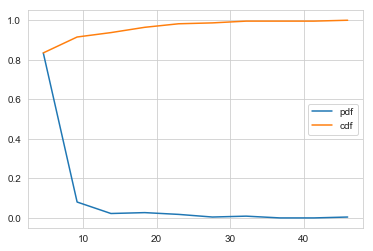

In [121]:
#PDF's gives us the value and CDF's gives us the percentage of those values
counts, bin_edges = np.histogram(haber_more_than_5_years['axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

labels = ["pdf","cdf"]
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#plt.show()
plt.legend(labels);

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


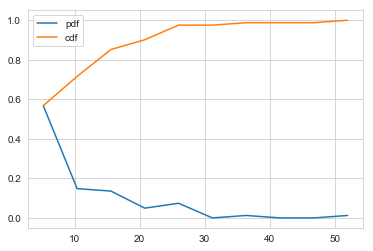

In [125]:

counts, bin_edges = np.histogram(haber_less_than_5_years['axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

labels = ["pdf","cdf"]
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#plt.show()
plt.legend(labels);

[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


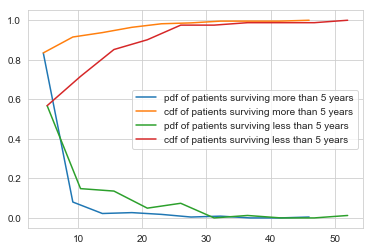

In [176]:
labels = ["pdf of patients surviving more than 5 years","cdf of patients surviving more than 5 years","pdf of patients surviving less than 5 years","cdf of patients surviving less than 5 years"]
counts, bin_edges = np.histogram(haber_more_than_5_years['axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(haber_less_than_5_years['axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

#plt.show()
plt.legend(labels)

## Observations:
1. We,can observe from the above graph that the percentage of patient surving for more than 5 years is    100% with axile value 30.
2. We can also observe that the percentage patient surviving less than 5 years is 100% with axile        value 50.
3. So,we can partially conclude that a person should have a mid range of axile value i.e., between 30-    40 to survive for more than 5 years with accuracy 100%.

# Box-plot and Whiskers

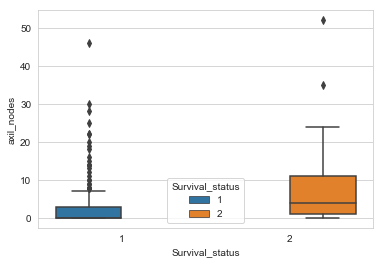

In [177]:
#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.
sns.boxplot(hue = 'Survival_status',x ='Survival_status', y ='axil_nodes',data =haber)
plt.show()

# Violin-plot

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


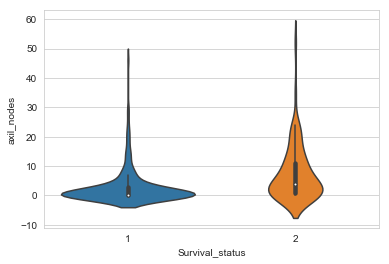

In [107]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner in a violin plot

sns.violinplot(hue='Survival_status',x ='Survival_status',y ='axil_nodes',data =haber)
plt.show()

## Conclusion:
1. We can conclude that the feature(variable) axil_nodes is of great use to model the data and to give    higher accuracy percent if plotted well.
2. We can see that the above plottings used Multivariate and Univariate are not efficient to              predict this dataset.
3. PDF's and CDF's gives us more information to analyse our dataset.
4. Apart from these techniques,further different techniques can help us to model our dataset well and    in an efficient manner.